<a href="https://colab.research.google.com/github/Abdulkbk/ml-ds-portfolio/blob/main/notebooks/mlp_classification_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


## MNIST - Classification

In [ ]:

(x_train_f, y_train_f), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


In [ ]:
x_train, y_train = x_train_f[:-5000], y_train_f[:-5000]

x_val, y_val = x_train_f[-5000:], y_train_f[-5000:]

In [ ]:
x_train.shape, x_val.shape

((55000, 28, 28), (5000, 28, 28))

In [ ]:
y_train.shape, y_val.shape

((55000,), (5000,))

In [ ]:
# check datatype
x_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [ ]:
x_train, x_val, x_test = x_train / 255., x_val / 255., x_test / 255.

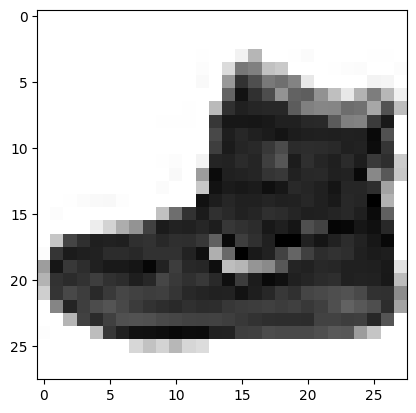

In [ ]:
# View a sample

plt.imshow(x_train[0], cmap='binary')
plt.show()

In [ ]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [ ]:
# prompt: check the corresponding class names of the mnist fashion labels

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
class_names[y_train[0]]

'Ankle boot'

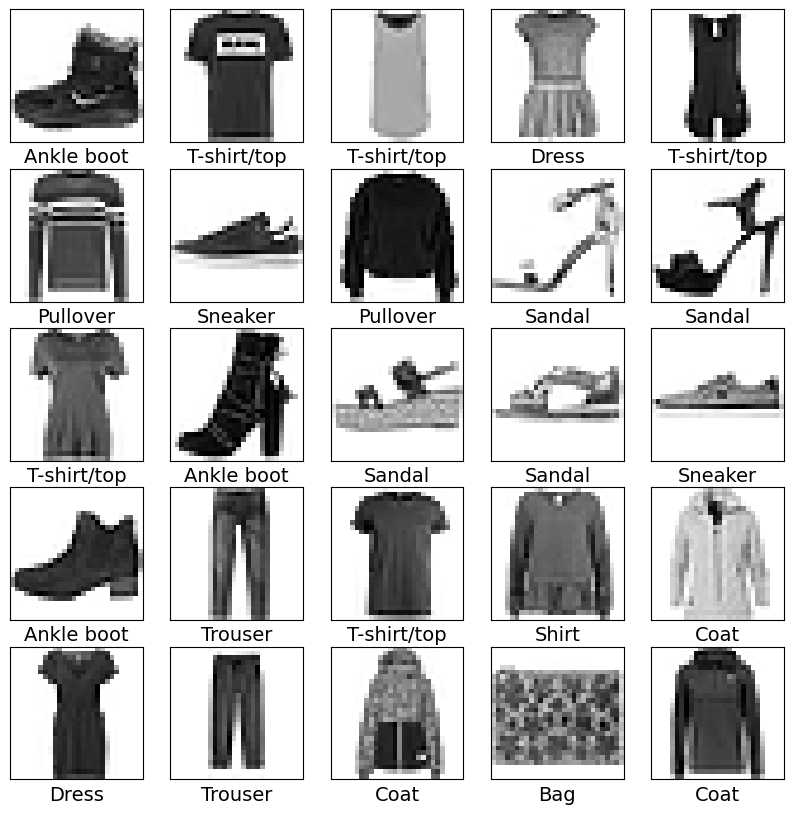

In [ ]:
# prompt: plot images of some of the x_train using matplotlib

plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap='binary')
  plt.xlabel(class_names[y_train[i]])
plt.show()


### Modeling


In [ ]:
tf.random.set_seed(42) # make sure the same random numbers are generate in each run

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


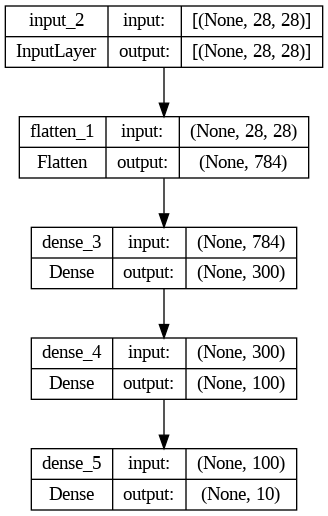

In [ ]:
# prompt: plot themodel architecture

tf.keras.utils.plot_model(model, show_shapes=True)


In [ ]:
model.layers

In [ ]:
# prompt: compile the model

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# prompt: fit the model

history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))


Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7176 - accuracy: 0.7614 - val_loss: 0.5057 - val_accuracy: 0.8280
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4858 - accuracy: 0.8317 - val_loss: 0.4582 - val_accuracy: 0.8368
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4384 - accuracy: 0.8465 - val_loss: 0.4280 - val_accuracy: 0.8504
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4139 - accuracy: 0.8545 - val_loss: 0.3926 - val_accuracy: 0.8636
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3932 - accuracy: 0.8614 - val_loss: 0.3892 - val_accuracy: 0.8652
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3774 - accuracy: 0.8672 - val_loss: 0.3949 - val_accuracy: 0.8644
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3654 - accuracy: 0.8700 - val_loss: 0.3717 - val_accuracy:

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

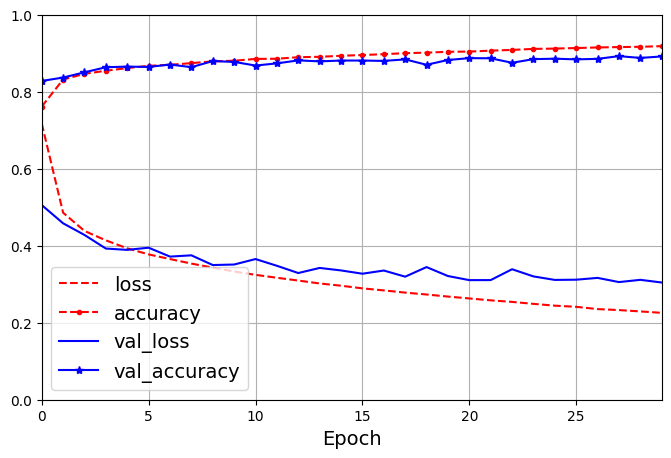

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

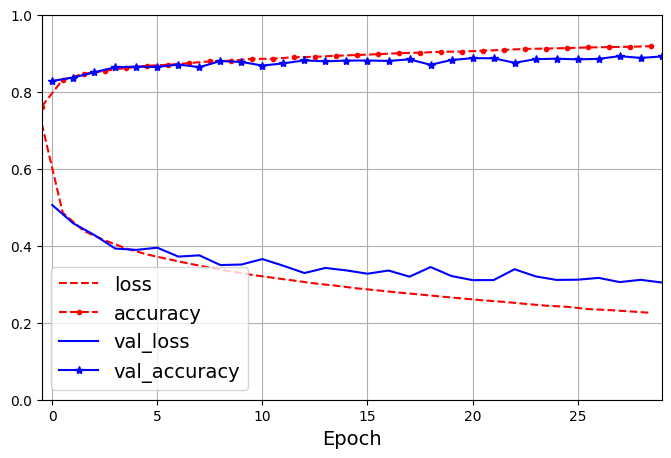

In [ ]:
# extra code – shows how to shift the training curve by -1/2 epoch
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [ ]:
# prompt: evaluate the model

model.evaluate(x_test, y_test)


313/313 [==============================] - 2s 5ms/step - loss: 0.3256 - accuracy: 0.8835


[0.3256132900714874, 0.8834999799728394]

In [ ]:
# prompt: make predictions

predictions = model.predict(x_test)

predictions.shape

y_pred = np.argmax(predictions, axis=1)

y_pred[:10]

y_test[:10]


## California - Regressiion

In [ ]:
# prompt: import most frequently used packages for neural nets

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# prompt: fetch california housing dataset

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()


In [ ]:
# prompt: split into train and test split. use sklearn

from sklearn.model_selection import train_test_split
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, random_state=42)


In [ ]:
tf.random.set_seed(42)

In [ ]:
x_train.shape[1:]

(8,)

In [ ]:
# prompt: create a model using tf Sequential, add a normalization layer as input

model = tf.keras.Sequential()
model.add(tf.keras.layers.Normalization(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5618 (21.95 KB)
Trainable params: 5601 (21.88 KB)
Non-trainable params: 17 (72.00 Byte)
____________________

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss='mse', optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [ ]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
387/387 [==============================] - 5s 4ms/step - loss: 26.2961 - root_mean_squared_error: 5.1280 - val_loss: 1.7198 - val_root_mean_squared_error: 1.3114
Epoch 2/20
387/387 [==============================] - 1s 3ms/step - loss: 92.4104 - root_mean_squared_error: 9.6130 - val_loss: 1.5253 - val_root_mean_squared_error: 1.2350
Epoch 3/20
387/387 [==============================] - 1s 4ms/step - loss: 5.2229 - root_mean_squared_error: 2.2854 - val_loss: 1.3867 - val_root_mean_squared_error: 1.1776
Epoch 4/20
387/387 [==============================] - 1s 3ms/step - loss: 1.1830 - root_mean_squared_error: 1.0877 - val_loss: 1.0838 - val_root_mean_squared_error: 1.0411
Epoch 5/20
387/387 [==============================] - 2s 4ms/step - loss: 1.3866 - root_mean_squared_error: 1.1775 - val_loss: 0.9265 - val_root_mean_squared_error: 0.9625
Epoch 6/20
387/387 [==============================] - 2s 5ms/step - loss: 1.0523 - root_mean_squared_error: 1.0258 - val_loss: 0.7522 - va

In [ ]:
mse_test, rmse_test = model.evaluate(x_test, y_test)

x_new = x_test[:3]
y_pred = model.predict(x_new)

1/1 [==============================] - 0s 186ms/step


In [ ]:
mse_test, rmse_test

(0.9218425750732422, 0.9601262807846069)

In [ ]:
y_pred

array([[1.6988193],
       [2.1762462],
       [2.6849635]], dtype=float32)